In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('drug-use-by-age.csv')
df.head()

,age,n,alcohol_use,alcohol_frequency,marijuana_use,marijuana_frequency,cocaine_use,cocaine_frequency,crack_use,crack_frequency,...,oxycontin_use,oxycontin_frequency,tranquilizer_use,tranquilizer_frequency,stimulant_use,stimulant_frequency,meth_use,meth_frequency,sedative_use,sedative_frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol_use              17 non-null     float64
 3   alcohol_frequency        17 non-null     float64
 4   marijuana_use            17 non-null     float64
 5   marijuana_frequency      17 non-null     float64
 6   cocaine_use              17 non-null     float64
 7   cocaine_frequency        17 non-null     object 
 8   crack_use                17 non-null     float64
 9   crack_frequency          17 non-null     object 
 10  heroin_use               17 non-null     float64
 11  heroin_frequency         17 non-null     object 
 12  hallucinogen_use         17 non-null     float64
 13  hallucinogen_frequency   17 non-null     float64
 14  inhalant_use             17 

In [9]:
df.describe()

,n,alcohol_use,alcohol_frequency,marijuana_use,marijuana_frequency,cocaine_use,crack_use,heroin_use,hallucinogen_use,hallucinogen_frequency,...,pain_releiver_use,pain_releiver_frequency,oxycontin_use,tranquilizer_use,tranquilizer_frequency,stimulant_use,stimulant_frequency,meth_use,sedative_use,sedative_frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,0.294118,0.352941,3.394118,8.411765,...,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,0.235772,0.333762,2.792506,15.000245,...,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.100000,2.000000,...,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,0.000000,0.100000,0.600000,3.000000,...,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,0.400000,0.200000,3.200000,3.000000,...,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,0.500000,0.600000,5.200000,4.000000,...,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,0.600000,1.100000,8.600000,52.000000,...,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol_use              17 non-null     float64
 3   alcohol_frequency        17 non-null     float64
 4   marijuana_use            17 non-null     float64
 5   marijuana_frequency      17 non-null     float64
 6   cocaine_use              17 non-null     float64
 7   cocaine_frequency        17 non-null     object 
 8   crack_use                17 non-null     float64
 9   crack_frequency          17 non-null     object 
 10  heroin_use               17 non-null     float64
 11  heroin_frequency         17 non-null     object 
 12  hallucinogen_use         17 non-null     float64
 13  hallucinogen_frequency   17 non-null     float64
 14  inhalant_use             17 

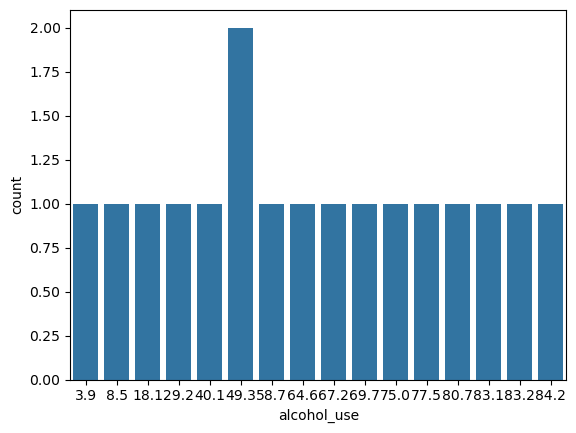

In [19]:
#Explore data
print(df.info())
sns.countplot(x='alcohol_use', data=df)
plt.show()